In [1]:
import numpy as np

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


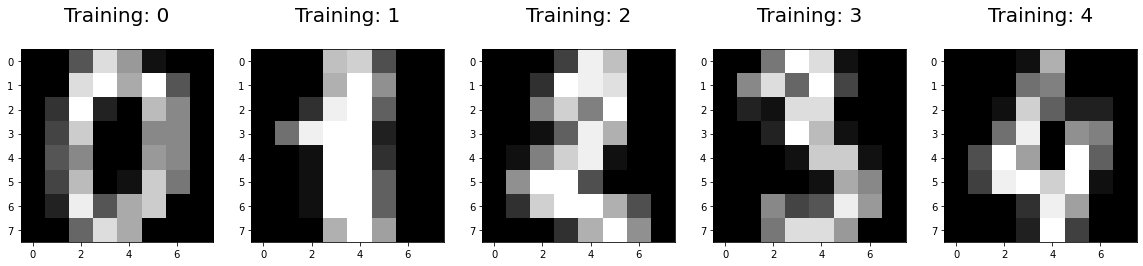

In [3]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

# Compulsory Task 1

In [3]:
#Import libraries
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


mnist_df = pd.read_csv('Mnist.csv')
mnist_df.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Split the data into a training, development, and test set.
from sklearn.model_selection import train_test_split

#setting the x and y axis
X = mnist_df.drop(columns='label').values
y = mnist_df['label'].values

X, y = make_classification(random_state=42)

# setting aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 42)

# Using the same function above for development set set
X_train, X_dev, y_train, y_dev= train_test_split(X_train, y_train, train_size = 0.25, random_state= 42) 

p = make_pipeline(StandardScaler(), LogisticRegression())
# applying scaling on training data
p.fit(X_train, y_train)  


# applying scaling on testing data, without leaking training data.
p.score(X_test, y_test)  


print("X_train shape: \n={}".format(X_train.shape))
print("X_test shape: \n={}".format(X_test.shape))
print("y_train shape: \n={}".format(y_train.shape))
print("y_test shape: \n={}".format(y_test.shape))
print("X_dev shape: \n={}".format(X_dev.shape))
print("y dev shape: \n={}".format(y_dev.shape))


X_train shape: 
=(20, 20)
X_test shape: 
=(20, 20)
y_train shape: 
=(20,)
y_test shape: 
=(20,)
X_dev shape: 
=(60, 20)
y dev shape: 
=(60,)


In [6]:
# Choose two machine learning algorithms among the ones discussed in the
# previous Tasks, and explain why you chose them
X_train.reshape(-1,1)
#1. 
#Logistic regression machine learning algorithm-
#Because it is easier to inspect and less complex
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_train)
predictions

#2
#because it classifies a new object based on the attributes and  
#the forest also chooses the classification having the most votes

# Instantiate model with 1000 decision trees
rft = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rft.fit(X_train,y_train)
pred = rft.predict(X_train)
pred

array([0.022, 0.016, 0.039, 0.87 , 0.966, 0.046, 0.938, 0.021, 0.03 ,
       0.789, 0.361, 0.084, 0.925, 0.046, 0.956, 0.988, 0.925, 0.982,
       0.891, 0.053])

In [ ]:
#ref: https://towardsdatascience.com/hyperparameter-tuning-in-python-21a76794a1f7
# For each model, pick one parameter to tune, and explain why you chose this
# parameter.

#1 
# I chose this parameter for tuning because it is a cross-validation method that extracts  
# the best parameter and then perform the predictions on the model
from sklearn.model_selection import GridSearchCV
grid_lr = GridSearchCV(estimator = logmodel, param_grid= mnist_df, scoring='accuracy', 
                       cv=6, refit=True, return_train_score=True) 
print(grid_lr)
preds = grid_lr.best_estimator_.predict(X_train)
preds



#2
#I also chose this parameter for tuning the model because 
#it will help me select the combinations randomly

from sklearn.model_selection import RandomizedSearchCV
random_rf = RandomizedSearchCV(estimator= rft, param_distributions= mnist_df,
                              n_iter=10, scoring='accuracy', cv=5,
                              refit=True, n_jobs=-1)

#Training and prediction
random_rf.fit(X_train, y_train)
predi = random_rf.best_estimator_.predict(X_train)
predi

In [ ]:
# Choose which value for the parameter to set for testing on the test data and
# explain why.(elaborate more on one of the above parameters)

#Answer: GridSearchCV, I would choose this value for the parameter to set for testing on the test data
#because it is a method that depends on the estimator being used and
#It can be applied to non-continuous functions also It is easy to implement. 

In [ ]:
# Print confusion matrices for your two competitor models’ predictions on the
# test set
# (use the x_test and y_test to do the confusion metrices)
# confusion matrices
#confusion matrix 1
from sklearn.metrics import plot_confusion_matrix
clf = GridSearchCV(random_state = 0)
clf.fit(X_train, y_train)
predict = clf.predict(y_train)
plot_confusion_matrix(clf, X_train, y_train)

In [ ]:
#confusion matrixes 2
from sklearn.metrics import plot_confusion_matrix
clf = RandomizedSearchCV(random_state = 0)
clf.fit(X_train, y_train)
predict = clf.predict(y_test)
plot_confusion_matrix(clf, X_train, y_train)

In [ ]:
# Report which classes the models struggle with the most.(get the answer from the above model's prediction)
#answer:
#GridSearchCV struggled to define the combinations and do training of the model

In [ ]:
# Report the accuracy, precision, recall, and f1-score.(use the sklearn method)
from sklearn.metrics import accuracy_score
acc = accuracy_score(X_test, y_test)
acc



In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score
#calculating the f1 score
f1 = f1_score(y_test, prediction, average = 'micro')
print(f1)


f_score = f1_score(y_test, prediction, average = None)
#claculating the lowest F1 score
minimum_score = min(f_score) 

#getting the hardest class in the Species column
hard_class = classes[list(f_score).index(minimum_score)]
print(f'The Hardest class is: {hard_class}')

In [ ]:
#precision score
from sklearn.metrics import precision_score

print(precision_score(y_test, prediction, average='macro'))
print(precision_score(y_test, prediction, average='micro'))
print(precision_score(y_test, prediction, average='weighted'))


In [ ]:
# Comment on the differences in performance and report which model you
# believe did the best job.
#answer: GridSearchCV, I think this model performed the  best because it extracted the best parameter